# Random_Forest_Diabetes




### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sbs

sbs.set_theme()

# %matplotlib qt
%matplotlib inline

### Loading Dataset

In [3]:
url="https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv"
df=pd.read_csv(url)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see that some values are outright outliers; like the Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI are just 0. Which doesn't seems a possible value.

In [7]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

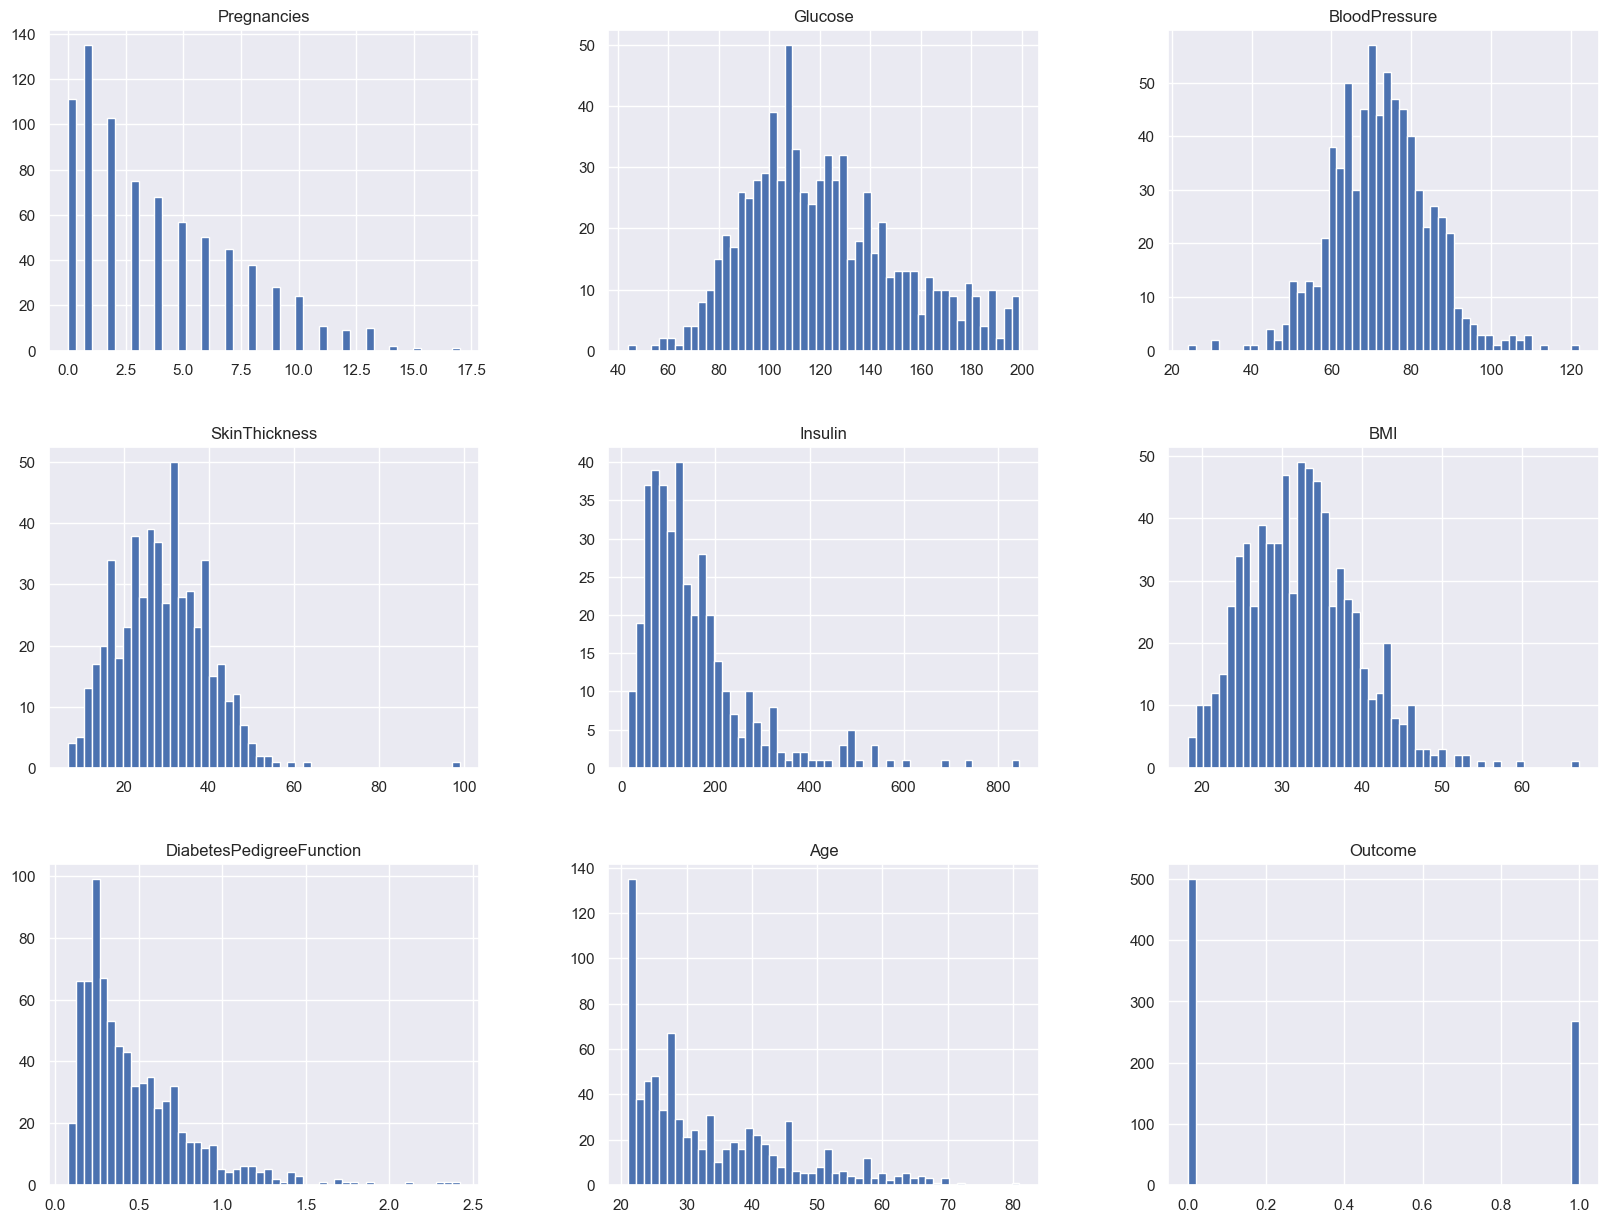

In [8]:
_ = df.hist(bins=50, figsize=(20, 15))

Taking count of diabetic and healthy persons

<Axes: >

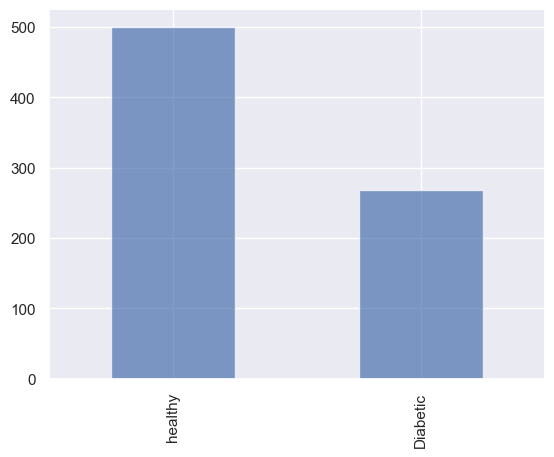

In [9]:
Healthy =  df[ df['Outcome'] == 0 ]
Diabetic = df[ df['Outcome'] == 1 ]

h_diab = pd.Series({'healthy':Healthy.shape[0],
            'Diabetic':Diabetic.shape[0]})
h_diab.plot.bar(alpha=0.7)

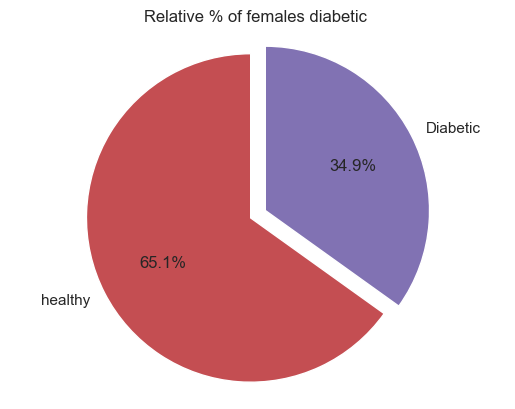

In [10]:
h_diab.plot.pie(startangle=90,
                explode=[0, 0.1],
                autopct='%1.1f%%',
                colors=['C3', 'C4'])
plt.title('Relative % of females diabetic ')
plt.ylabel('')
_ = plt.axis('equal')

### Taking a look at null values

In [11]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [12]:
df.pivot_table(index=['Outcome'] )

,Age,BMI,BloodPressure,DiabetesPedigreeFunction,Glucose,Insulin,Pregnancies,SkinThickness
Outcome,,,,,,,,
0,31.190000,30.859674,70.877339,0.429734,110.643863,130.287879,3.298000,27.235457
1,37.067164,35.406767,75.321429,0.550500,142.319549,206.846154,4.865672,33.000000


We can replace this null values with median values with the appropriate values for the given outcome.

<mark>If the distribution is not symmetrical, it makes sense to use a median instead of the mean. B/c it represents the series better as it will be less affected by median outliers.</mark>

In [13]:
def replace_null_values(df):
    for col in df.columns:
        df.loc[(df['Outcome']==0) & (df[col].isnull()), col] = df[df['Outcome'] == 0][col].median()
        df.loc[(df['Outcome']==1) & (df[col].isnull()), col] = df[ df['Outcome'] == 1][col].median()
    print(df.isnull().sum())

replace_null_values(df)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Feature Engineering

In [14]:
def create_new_bmi(df):
    new_cat = "NEW_BMI_CAT"
    df.loc[(df['BMI'] < 18.5), new_cat] = "underweight"
    df.loc[(df['BMI'] > 18.5) & (df['BMI'] < 25), new_cat] = "normal"
    df.loc[(df['BMI'] > 24) & (df['BMI'] < 30), new_cat] =  "overweight"
    df.loc[(df['BMI'] > 30) & (df['BMI']< 40), new_cat] = "obese"
    df.drop('BMI', axis=1, inplace=True)
    df[new_cat] = df[new_cat].astype('category')

def create_new_glucose(df):
    new_cat = "NEW_GLUCOSE_CAT"
    df.loc[(df['Glucose'] < 70), new_cat] = "low"
    df.loc[(df['Glucose'] > 70) & (df['Glucose'] < 99), new_cat] = "normal"
    df.loc[(df['Glucose'] > 99) & (df['Glucose'] < 126), new_cat] = "high"
    df.loc[(df['Glucose'] > 126) & (df['Glucose'] < 200), new_cat] = "very_high"
    df[new_cat] = df[new_cat].astype('category')


def create_new_skinthickness(df):
    new_cat = "NEW_SKIN_THICKNESS"
    df.loc[df['SkinThickness'] < 30, new_cat] = "normal"
    df.loc[df['SkinThickness'] >= 70, new_cat] = "highfat"
    df[new_cat] = df[new_cat].astype('category')

def create_new_pregnancies(df):
    new_cat = "NEW_PREGNANCIES"
    df.loc[df['Pregnancies'] == 0, new_cat] = "no_pregnancies"
    df.loc[(df['Pregnancies'] > 0) & df['Pregnancies'] <= 4, new_cat] = "std_pregnancies"
    df.loc[(df['Pregnancies'] > 4), new_cat] = "over_pregnancies"
    df[new_cat] = df[new_cat].astype('category')

def create_circulation_level(df):
    new_cat = "NEW_CIRCULATION_LEVEL"
    df.loc[(df['SkinThickness'] < 30) & (df['BloodPressure'] < 80), new_cat] = "normal"
    df.loc[(df['SkinThickness'] > 30) & (df['BloodPressure']>= 80), new_cat] = "high_risk"
    df.loc[((df['SkinThickness']< 30) & (df['BloodPressure'] >=80)) | ((df['SkinThickness']> 30) & (df['BloodPressure'] <80)), new_cat] = "medium_risk"
    df[new_cat] = df[new_cat].astype('category')
    df.drop('SkinThickness', axis=1, inplace=True)

def create_other_features(df):
    df['PRE_AGE_CAT'] = df['Age'] * df['Pregnancies']
    df['INSULIN_GLUCOSE_CAT'] = df['Insulin'] * df['Glucose']
    df.drop('Pregnancies', axis=1, inplace=True)
    df.drop('Glucose', axis=1, inplace=True)

create_new_bmi(df)
create_new_glucose(df)
create_new_pregnancies(df)
create_new_skinthickness(df)
create_circulation_level(df)
create_other_features(df)
df

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,NEW_BMI_CAT,NEW_GLUCOSE_CAT,NEW_PREGNANCIES,NEW_SKIN_THICKNESS,NEW_CIRCULATION_LEVEL,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT
0,72.0,169.5,0.627,50,1,obese,very_high,over_pregnancies,NaN,medium_risk,300,25086.0
1,66.0,102.5,0.351,31,0,overweight,normal,std_pregnancies,normal,normal,31,8712.5
2,64.0,169.5,0.672,32,1,normal,very_high,over_pregnancies,NaN,medium_risk,256,31018.5
3,66.0,94.0,0.167,21,0,overweight,normal,std_pregnancies,normal,normal,21,8366.0
4,40.0,168.0,2.288,33,1,NaN,very_high,std_pregnancies,NaN,medium_risk,0,23016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,76.0,180.0,0.171,63,0,obese,high,over_pregnancies,NaN,medium_risk,630,18180.0
764,70.0,102.5,0.340,27,0,obese,high,std_pregnancies,normal,normal,54,12505.0
765,72.0,112.0,0.245,30,0,overweight,high,over_pregnancies,normal,normal,150,13552.0
766,60.0,169.5,0.349,47,1,obese,NaN,std_pregnancies,NaN,medium_risk,47,21357.0


### Label Encoding
Doing Label encoding only for `Outcome` column.

In [15]:
df['NEW_CIRCULATION_LEVEL'].dtype.name == 'category'

True

In [16]:
len(df['NEW_CIRCULATION_LEVEL'].unique())

4

In [17]:
label_encoder = preprocessing.LabelEncoder()
df['Outcome'] = label_encoder.fit_transform(df['Outcome'])

### One-Hot Encoding
We'll do One-Hot encoding for categorical cols.

In [18]:
categ_cols = [col for col in df.columns if df[col].dtype.name == 'category']
print(categ_cols)

['NEW_BMI_CAT', 'NEW_GLUCOSE_CAT', 'NEW_PREGNANCIES', 'NEW_SKIN_THICKNESS', 'NEW_CIRCULATION_LEVEL']


In [19]:
def one_hot_encoder(df, columns):
    df_dummy = df.copy()
    df_dummy = pd.get_dummies(df, columns=columns, drop_first=True)
    return df_dummy

result = one_hot_encoder(df, categ_cols)
result

,BloodPressure,Insulin,DiabetesPedigreeFunction,Age,Outcome,PRE_AGE_CAT,INSULIN_GLUCOSE_CAT,NEW_BMI_CAT_obese,NEW_BMI_CAT_overweight,NEW_BMI_CAT_underweight,NEW_GLUCOSE_CAT_low,NEW_GLUCOSE_CAT_normal,NEW_GLUCOSE_CAT_very_high,NEW_PREGNANCIES_std_pregnancies,NEW_SKIN_THICKNESS_normal,NEW_CIRCULATION_LEVEL_medium_risk,NEW_CIRCULATION_LEVEL_normal
0,72.0,169.5,0.627,50,1,300,25086.0,True,False,False,False,False,True,False,False,True,False
1,66.0,102.5,0.351,31,0,31,8712.5,False,True,False,False,True,False,True,True,False,True
2,64.0,169.5,0.672,32,1,256,31018.5,False,False,False,False,False,True,False,False,True,False
3,66.0,94.0,0.167,21,0,21,8366.0,False,True,False,False,True,False,True,True,False,True
4,40.0,168.0,2.288,33,1,0,23016.0,False,False,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,76.0,180.0,0.171,63,0,630,18180.0,True,False,False,False,False,False,False,False,True,False
764,70.0,102.5,0.340,27,0,54,12505.0,True,False,False,False,False,False,True,True,False,True
765,72.0,112.0,0.245,30,0,150,13552.0,False,True,False,False,False,False,False,True,False,True
766,60.0,169.5,0.349,47,1,47,21357.0,True,False,False,False,False,False,True,False,True,False


### Model Training using GridSearchCV
- Grid search helps to find the best combination of hyperparameters that maximizes the model's performance.

In [20]:
from sklearn.model_selection import train_test_split

X = result.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, recall_score, roc_auc_score

# Defining hyperparameter grid
param_grid = {'n_estimators': [400, 500, 600],
              'max_leaf_nodes': [14, 15, 16]}

# Instantiate the model
random_forest = RandomForestClassifier(n_jobs=-1)

# Setup grid search
grid_search_rf = GridSearchCV(random_forest,
                              param_grid=param_grid,
                              cv=3,
                              scoring='recall',
                              return_train_score=True)

# Fit the training data
grid_search_rf.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters: ", grid_search_rf.best_params_)

Best Parameters:  {'max_leaf_nodes': 15, 'n_estimators': 400}


In [27]:
# Evaluate on test set
y_pred = grid_search_rf.predict(X_test)
y_proba = grid_search_rf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        99
           1       0.75      0.80      0.77        55

    accuracy                           0.83       154
   macro avg       0.81      0.82      0.82       154
weighted avg       0.83      0.83      0.83       154

Recall Score: 0.8
ROC-AUC Score: 0.923048668503214
